In [18]:
import fundamentalanalysis as fa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import statistics as st
from matplotlib.pyplot import figure

%matplotlib inline 

In [19]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [20]:
# api_key = '00ef9804fcde0edd93b1b4821ee2f06a'
api_key = 'c81352430e2fe3c941faf0814227562b'

data

In [21]:

''' Колонки '''
ticker = 'MSFT'
# ticker = 'AAPL'



''' для фильтрации'''
filt_start_date = '1999'
filt_finish_date = '2022'


''' время '''
stime=f'{str(int(filt_start_date)-1)}-01-01'
ftime='2023-02-01'
period = '1mo'  # '1d' '1wk'

ticker and stock data

In [22]:
def get_data_from_ticker(tick, stime, ftime, interval=period):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

df = get_data_from_ticker(ticker, stime, None, period)
df_market = get_data_from_ticker('^GSPC', stime, None, period)
df.tail(3)

,MSFT
Date,
2022-12-01 00:00:00-05:00,239.820007
2023-01-01 00:00:00-05:00,247.809998
2023-02-01 00:00:00-05:00,266.730011


change index to add in metriks df

In [23]:
def change_index(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        t = df_index[i].date()
        df_index[i] = t.strftime('%Y-%m-%d')
    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

df = change_index(df)
df_market  = change_index(df_market)
df.tail(3)

,MSFT
Date_index,
2022-12-01,239.820007
2023-01-01,247.809998
2023-02-01,266.730011


In [24]:
''' добавляем цифру к году, чтобы видень данные как начало года, а не как факт '''
def change_index_plus_one(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        df_index[i] = str(int(df_index[i])+1)
    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

key_metrics

In [25]:
key_metrics = fa.key_metrics(ticker, api_key, period='annual')
df_key_metr = key_metrics.T
df_key_metr = change_index_plus_one(df_key_metr)
df_key_metr.head(3)

,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
Date_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023,FY,26.450107,9.703575,11.877668,8.691169,13.973986,22.217449,11.702241,22.217449,8.448906,2104426966539.200195,2151765966539.200195,28.931603,10.613945,23.635952,32.301754,12.636014,12.636014,10.852706,21.466355,24.167642,33.028381,0.034564,0.030958,0.351389,0.54352,0.472261,1.784607,40.418323,1.224051,0.008618,0.249319,0.029757,0.123629,0.216045,-0.268277,-0.120472,-1.651867,0.037837,69.647294,0.309103,0.254313,-7.801794,74602000000,87720000000,-28614000000,0.367895,41152000000,17081500000,3189000000,81.481137,110.694334,21.800958,4.479564,3.297368,16.742384,0.436755,-3.186499
2022,FY,22.272161,8.11859,10.168279,7.435802,17.269644,18.813833,11.193454,18.813833,9.291242,2150215797923.900146,2203766797923.900391,35.093532,12.792203,28.019492,38.315973,15.143645,15.143645,13.110792,25.88586,28.717316,39.270231,0.028495,0.026099,0.420479,0.574605,0.62902,2.079994,29.802217,1.252469,0.007683,0.269638,0.030383,0.123245,0.172303,-0.268726,-0.122686,-1.764676,0.036398,58.623294,0.285229,0.221781,-4.187989,95749000000,84477000000,-7385000000,0.477329,38043000000,15163000000,2636000000,82.609675,105.959852,18.420509,4.418369,3.444701,19.814871,0.431522,-2.732476
2021,FY,18.793035,5.818791,7.973062,5.944021,17.940473,15.545861,8.924442,15.545861,9.670039,1551678953579,1609100953579,35.041642,10.849764,25.573613,34.303377,13.116031,13.116031,11.251274,23.51696,26.519999,35.57282,0.028537,0.029152,0.568442,0.607369,0.839221,2.515765,20.439599,1.370227,0.009755,0.34184,0.035738,0.134734,0.167233,-0.254487,-0.107968,-1.206705,0.036982,45.114383,0.231261,0.176473,-2.828417,109605000000,67915000000,-1092000000,0.600132,35027000000,13846500000,2265500000,81.697829,99.254525,15.01096,4.467683,3.677414,24.315567,0.374298,-2.029041


In [26]:
df_key_metr = df_key_metr.loc[filt_finish_date:filt_start_date].copy(deep=True)
index_years = df_key_metr.index.to_list()

In [27]:
def get_price_from_df(df, list_dates):
    new_list = []
    for i in range(len(list_dates)):
        x = int(list_dates[i])
        # x += 1
        x = str(x)
        r = df.loc[f'{x}-01-01']
        r = float(r)
        new_list.append(r)
        
    return new_list
        
stock_year_prices = get_price_from_df(df, index_years)
stock_year_market_prices = get_price_from_df(df_market, index_years)

In [28]:
df_key_metr[ticker] = list(stock_year_prices)
df_key_metr['SNP'] = list(stock_year_market_prices)
df_key_metr.drop('period', axis=1, inplace=True)

add_percent_columns

In [29]:
def change_percent_all_columns(df):
    x = df.columns.to_list()
    for i in range(len(x)):
        v = df[x[i]].to_list()
        l = []
        for y in range(len(v)):
            try:
                # if y != len(v):
                #     vv = (v[y] / (v[y+1] / 100)) - 100
                #     l.append(vv)
                #     # print(vv)
                if y != len(v):
                    if v[y] < 0 and v[y+1] > 0:
                        l.append('Minus')
                    elif v[y] > 0 and v[y+1] < 0:
                        l.append('Plus')
                    else:
                        vv = (v[y] / (v[y+1] / 100)) - 100
                        l.append(vv)  
                else:
                    vv = 0
                    l.append(vv)
                    # print(vv)
            except:
                l.append(0)
        df[f'change % {x[i]}'] = l
    return df

df_with_changes_key = change_percent_all_columns(df_key_metr)

Vizualization key_metrics

In [30]:
df_with_changes_key = df_with_changes_key.reindex(index=df_with_changes_key.index[::-1])

In [31]:
df_test = df_with_changes_key[[ticker, f'change % {ticker}']]
df_test

,MSFT,change % MSFT
Date_index,,
1999,27.363913,0.000000
2000,30.608498,11.857168
2001,19.096107,-37.611745
2002,19.924059,4.335708
2003,14.842192,-25.506184
2004,17.446938,17.549604
2005,18.536364,6.244225
2006,20.097801,8.423646
2007,22.351357,11.212945


In [32]:
''' necessary columns '''

km0 = f'{ticker}'
km1 = f'change % {ticker}'
km2 = 'SNP'
km3 = 'change % SNP'
km4 = 'change % debtToAssets'

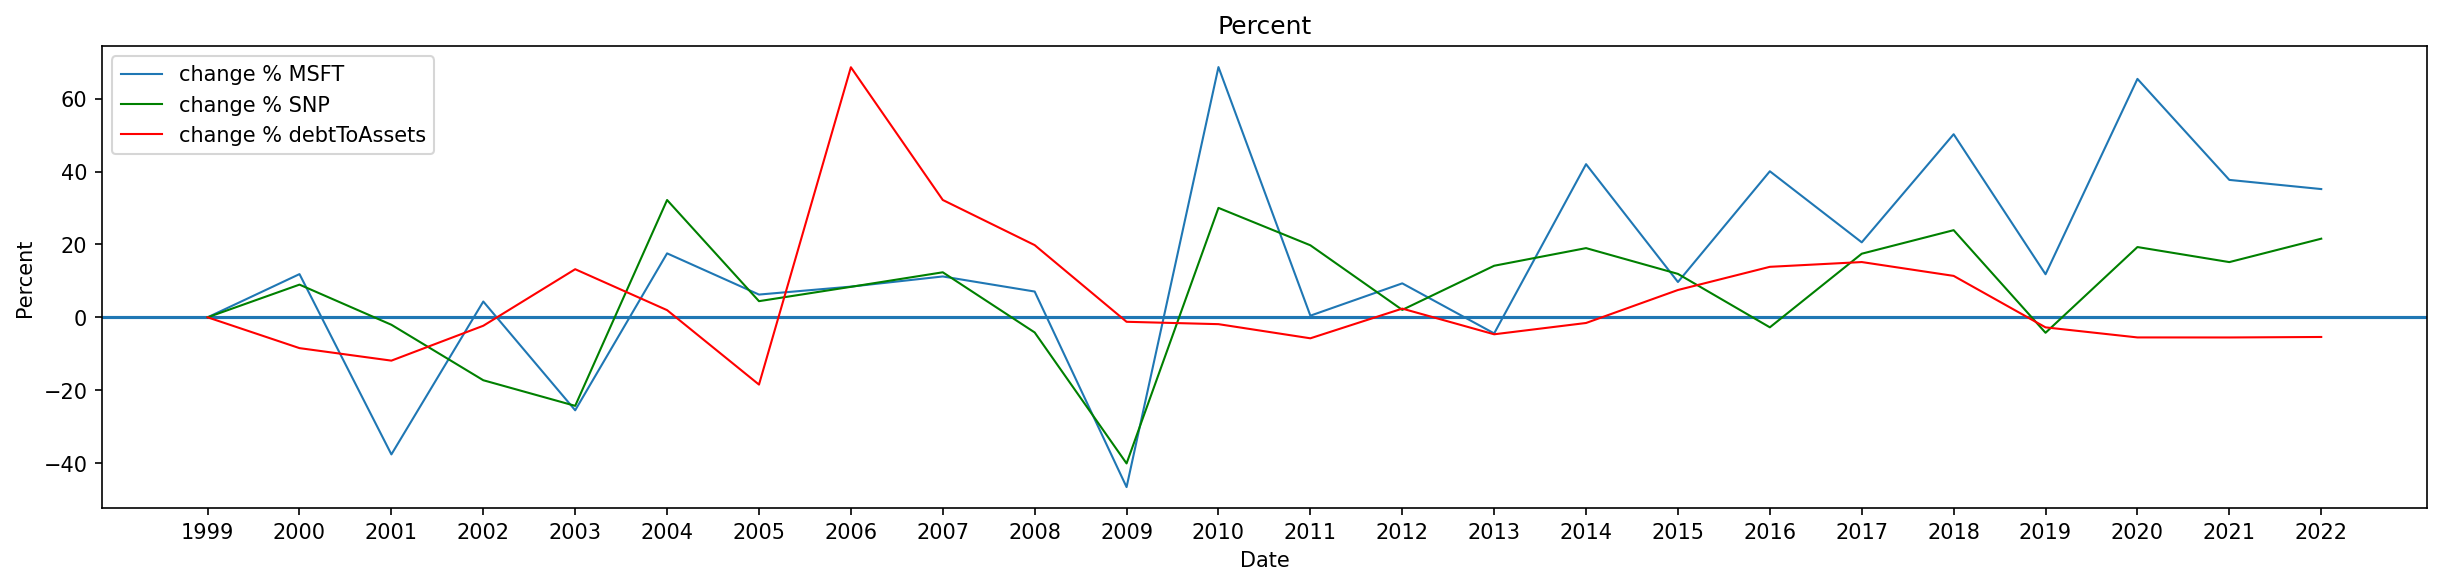

In [33]:
# plot size
figure(figsize=(20,4), dpi=150)
plt.axhline(y=0, linestyle='-')


# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


# Plot 
plt.plot(df_with_changes_key[km1],lw=1, label=km1)
plt.plot(df_with_changes_key[km3],'g',lw=1, label=km3)
plt.plot(df_with_changes_key[km4],'r',lw=1, label=km4)

# Add a legend to the axis
plt.legend()

plt.show()